In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Murilo Farias
CT1004837

In [3]:
#Loading my dataset in a frame
#attention about the path, should be users/... also be attention on those bars /
#first option if inside the same folder ipynb and csv
    #df = pd.read_csv("vancouver_shopping_dataset.csv")

#second option if outside the folder
file_path = "C://Users/MuriloFarias/Desktop/GitHub/Python/CLASSE_DEA109/Assignment/vancouver_shopping_dataset.csv"
df = pd.read_csv(file_path)


In [4]:
#print number of rows and columns after generate a dataframe
print(df.shape)

(2000, 14)


In [5]:
#To have a look at the dataset only a few first rows
df.head()

,VisitDuration,PagesVisited,ItemsViewed,DeviceType,AdClicks,CartAdds,Age,Gender,Loc_Burnaby,Loc_Downtown,Loc_Kitsilano,Loc_New Westminster,Loc_Surrey,Purchase
0,0.548814,12,2,0,5,0,35,1,True,False,False,False,False,1
1,0.715189,16,2,1,0,0,43,0,True,False,False,False,False,1
2,0.602763,5,4,1,5,0,18,0,True,False,False,False,False,1
3,0.544883,18,7,0,2,0,21,0,False,False,False,False,True,1
4,0.423655,13,6,1,4,2,33,1,False,False,False,True,False,1


Once I cannot see the whole data set I would like to know if has missing values

In [6]:
# Count missing values from each column
print(df.isnull().sum())

VisitDuration          0
PagesVisited           0
ItemsViewed            0
DeviceType             0
AdClicks               0
CartAdds               0
Age                    0
Gender                 0
Loc_Burnaby            0
Loc_Downtown           0
Loc_Kitsilano          0
Loc_New Westminster    0
Loc_Surrey             0
Purchase               0
dtype: int64


One of the requirements is about only number in my whole dataset, so I wanna check it now

In [8]:
#printing the datatype by each column
print(df.dtypes)

VisitDuration          float64
PagesVisited             int64
ItemsViewed              int64
DeviceType               int64
AdClicks                 int64
CartAdds                 int64
Age                      int64
Gender                   int64
Loc_Burnaby               bool
Loc_Downtown              bool
Loc_Kitsilano             bool
Loc_New Westminster       bool
Loc_Surrey                bool
Purchase                 int64
dtype: object


In [9]:
# Summary statistics only for numerical columns
print(df.describe())

       VisitDuration  PagesVisited  ItemsViewed   DeviceType    AdClicks  \
count    2000.000000   2000.000000  2000.000000  2000.000000  2000.00000   
mean        0.503636     10.149000     8.032000     0.507500     2.47400   
std         0.294983      5.739884     4.377392     0.500069     1.70434   
min         0.000367      1.000000     1.000000     0.000000     0.00000   
25%         0.249253      5.000000     4.000000     0.000000     1.00000   
50%         0.501194     10.000000     8.000000     1.000000     2.00000   
75%         0.766804     15.000000    12.000000     1.000000     4.00000   
max         0.999809     20.000000    15.000000     1.000000     5.00000   

         CartAdds          Age       Gender     Purchase  
count  2000.00000  2000.000000  2000.000000  2000.000000  
mean      1.51450    33.251000     0.494500     0.972000  
std       1.09608     9.699177     0.500095     0.165014  
min       0.00000    16.000000     0.000000     0.000000  
25%       1.00000   

Based on my statitics I could imagine how balanced my dataset are based on my min, Q1, Q2, Q3 max 

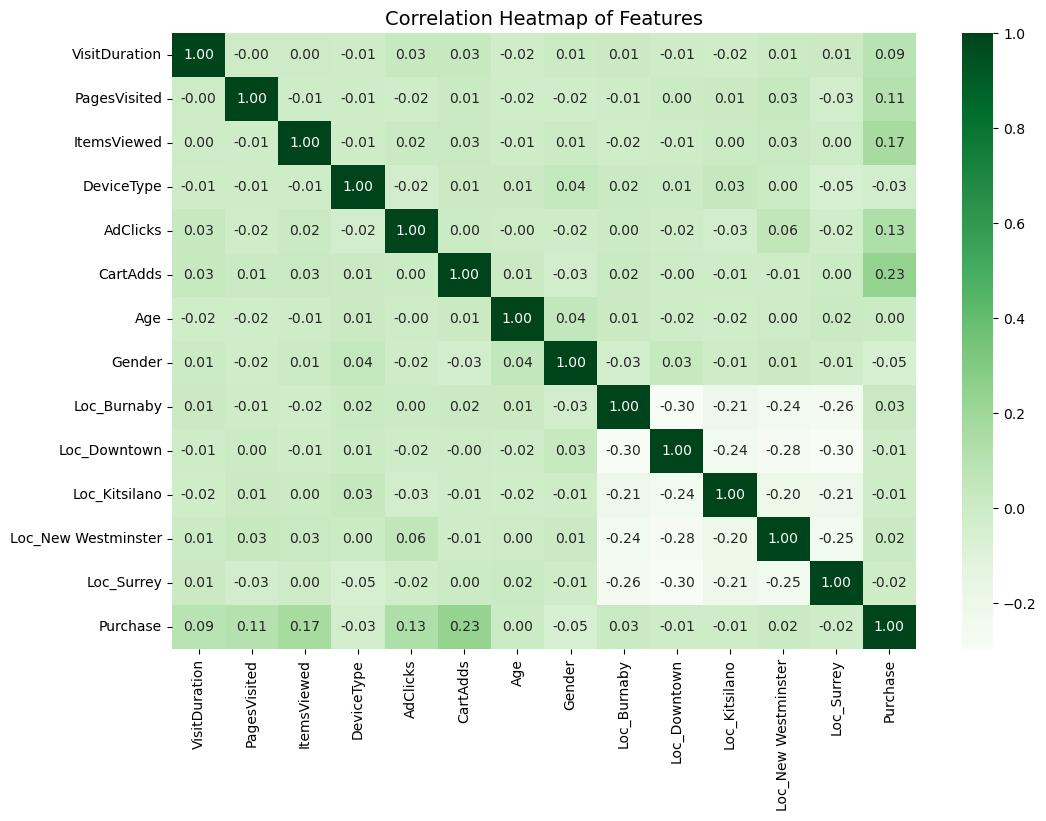

In [10]:
#Correlation visual for all columns
corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, 
            annot=True,        # show correlation values
            fmt=".2f",         # 2 decimal places
            cmap="Greens"   # color map
)

plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()

I`m not so happy because my dataset doesnt have a strong correlation between my features and label, the most strong are cartsadds and purchase +0.23 and the most strong negativa are Loc_Dowtown and Loc_Burnaby with -30

Based on my Summary statistics
I was wondering how many Purchase I have based on my pagesvisited. I know my purchase is 1 when someone buy something or 0 when someone left with buy anything.
Also for pagesvisited I have minimal 1 and maximal 20

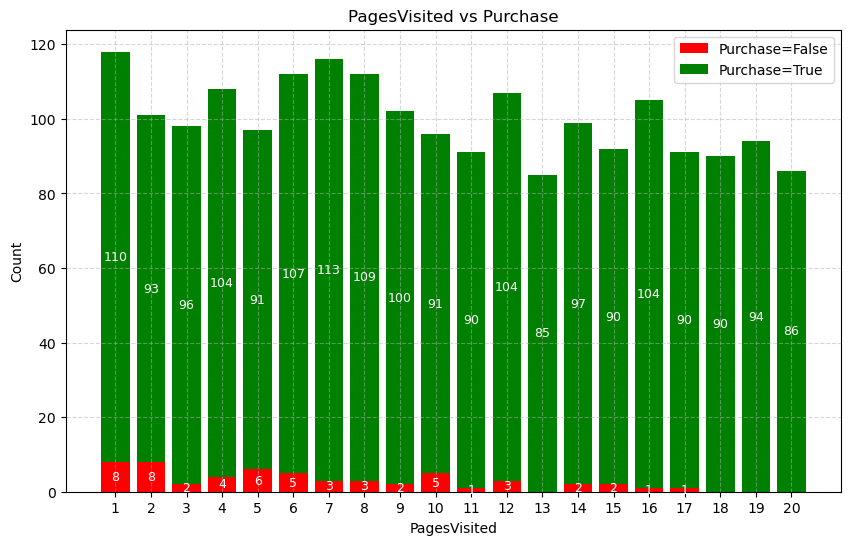

In [16]:
import matplotlib.pyplot as plt
import numpy as np

x_col = "PagesVisited"
y_col = "Purchase"

# Count of True purchases per PagesVisited
purchase_true = df[df[y_col]==True][x_col].value_counts().sort_index()

# Count of False purchases per PagesVisited
purchase_false = df[df[y_col]==False][x_col].value_counts().sort_index()

# Force x-axis from 1 to 20
pages = list(range(1, 21))

# Prepare counts aligned with pages
true_counts = [purchase_true.get(p, 0) for p in pages]
false_counts = [purchase_false.get(p, 0) for p in pages]

# Plot stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(pages, false_counts, color="red", label="Purchase=False")
plt.bar(pages, true_counts, bottom=false_counts, color="green", label="Purchase=True")

# Add labels (optional: counts on bars)
for i, (t, f) in enumerate(zip(true_counts, false_counts)):
    if f > 0:  # show only if value > 0
        plt.text(pages[i], f/2, str(f), ha="center", va="center", color="white", fontsize=9)
    if t > 0:
        plt.text(pages[i], f + t/2, str(t), ha="center", va="center", color="white", fontsize=9)

plt.xlabel(x_col)
plt.ylabel("Count")
plt.title(f"{x_col} vs {y_col}")
plt.legend()
plt.xticks(pages)  # ensure all ticks from 1 to 20
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


That was a good insight I could see I have more Pruchase = True than False and there is a small tendency for false (they are hight when I have less visits on my pages) 

Now I wanna know for each PagesVisit how many data I have.

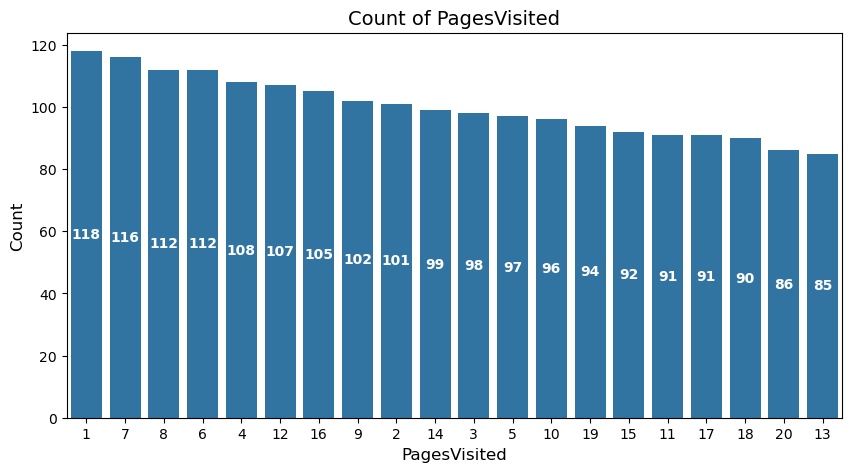

In [15]:
#sort by desc
# Pick the column you want to count
col = "PagesVisited"   

# Get counts sorted in descending order
order = df[col].value_counts().index

plt.figure(figsize=(10,5))
ax = sns.countplot(x=df[col], order=order)

# Add labels inside each bar
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontsize=10, weight="bold")

plt.title(f"Count of {col}", fontsize=14)
plt.xlabel(col, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


I check manually the total sum and yes all = 2000
but Im wondering about percentage for each one

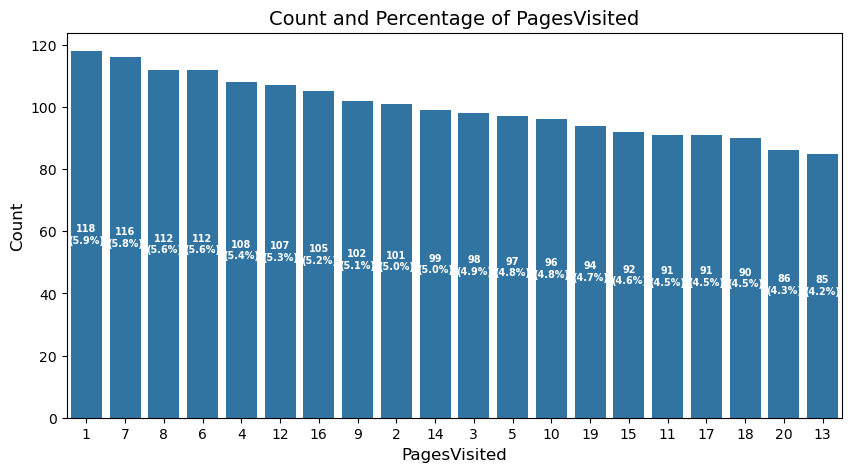

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

col = "PagesVisited" 

# Get counts sorted in descending order
value_counts = df[col].value_counts()
order = value_counts.index
total = len(df)

plt.figure(figsize=(10, 5))
ax = sns.countplot(x=df[col], order=order)

# Add labels: count + percentage
for p in ax.patches:
    count = int(p.get_height())
    percent = 100 * count / total
    ax.annotate(f"{count}\n({percent:.1f}%)",
                (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                ha="center", va="center", color="white", fontsize=7, weight="bold")

plt.title(f"Count and Percentage of {col}", fontsize=14)
plt.xlabel(col, fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


Now about the Age column, I wanna know the count of age by each age

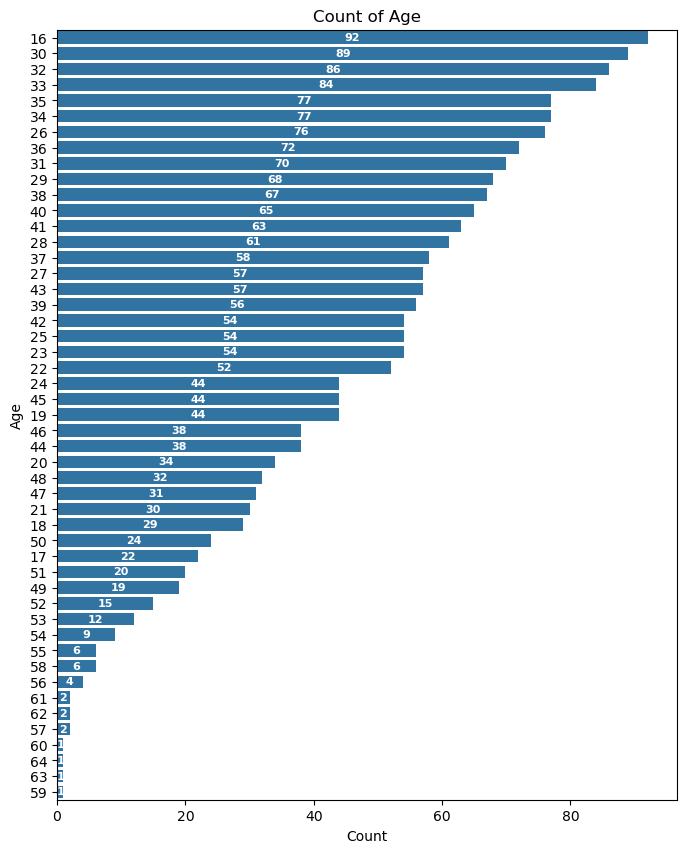

In [17]:
col = "Age"  

# Get counts sorted descending
counts = df[col].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,10))
ax = sns.countplot(y=df[col], order=counts.index)  # sort bars by counts descending

# Add labels inside each bar
for container in ax.containers:
    ax.bar_label(container, label_type="center", color="white", fontsize=8, weight="bold")

plt.title(f"Count of {col}")
plt.ylabel(col)
plt.xlabel("Count")
plt.show()


I realized that should be good to create a boxplot from my age column

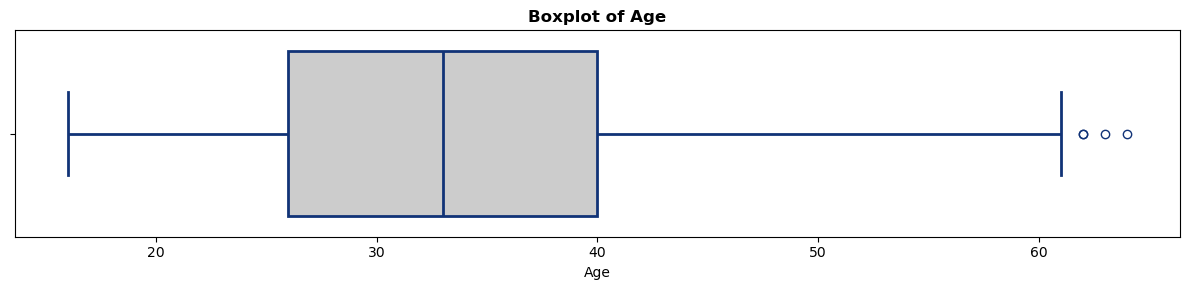

In [19]:
# Columns you want to check
cols = ["Age"]

plt.figure(figsize=(12,3))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i) #adding some diferent colors and style
    sns.boxplot(x=df[col], color=".8", linecolor="#137", linewidth=2)
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

Really liked because there are 3 or more outliers and I have Q1 around 27, Q2 = 34 and Q3 = 40 
But I`m not sure about these values, so i wanna generate another one printing the exacly values

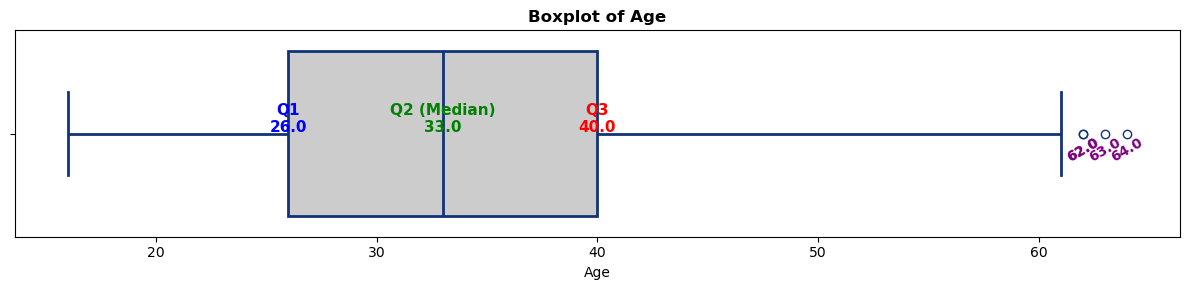

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Columns you want to check
cols = ["Age"]

plt.figure(figsize=(12,3))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)

    # Draw boxplot
    sns.boxplot(x=df[col], color=".8", linecolor="#137", linewidth=2)

    # Calculate Q1, Q2, Q3
    q1 = np.percentile(df[col].dropna(), 25)
    q2 = np.percentile(df[col].dropna(), 50)  # median
    q3 = np.percentile(df[col].dropna(), 75)

    # Add horizontal labels for Q1, Q2, Q3 (moved down a bit and larger font)
    for q, label, color in zip([q1, q2, q3], ["Q1", "Q2 (Median)", "Q3"], ["blue", "green", "red"]):
        plt.text(q, -0.15, f"{label}\n{q:.1f}", 
                 ha="center", va="top", color=color, fontsize=11, fontweight="bold")

    # Calculate IQR and outliers
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    # Add labels for outliers (placed a bit higher and larger font)
    for out in outliers:
        plt.text(out, 0.15, f"{out:.1f}", ha="center", va="bottom", 
                 color="purple", fontsize=10, fontweight="bold", rotation=30)

    plt.title(f"Boxplot of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()


Now Im sure about the values Q1 = 26 , Q2 = 33 Q3= 40 and I have outliers = 62, 63 and 64 y

Why not generate boxplot for some others columns as well

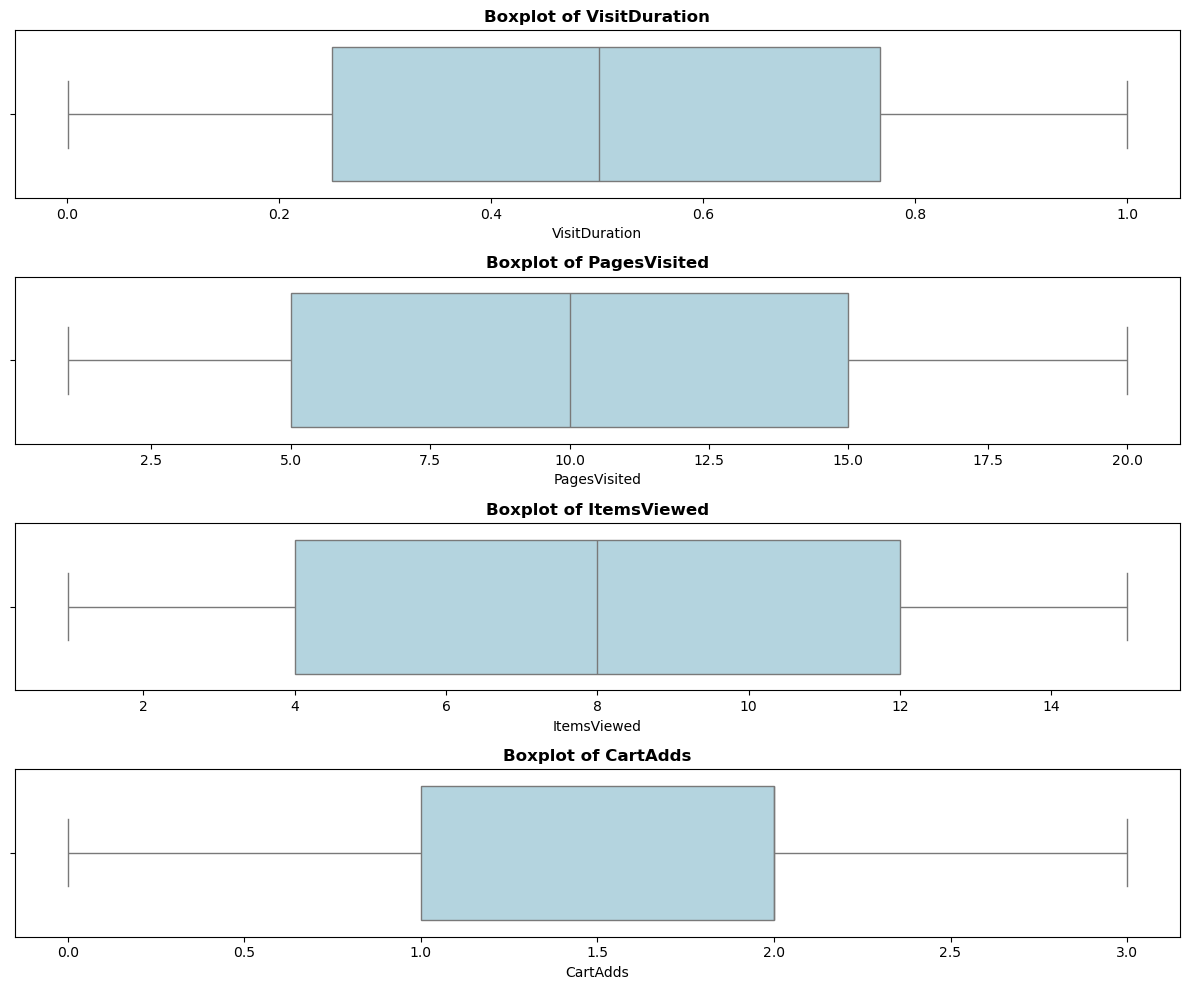

In [23]:
# Columns you want to check
cols = ["VisitDuration", "PagesVisited", "ItemsViewed", "CartAdds"]

plt.figure(figsize=(12, len(cols) * 2.5))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    sns.boxplot(x=df[col], color="lightblue")
    plt.title(f"Boxplot of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)

plt.tight_layout()
plt.show()

Moving for locations columns I wanna see how many I have for each location

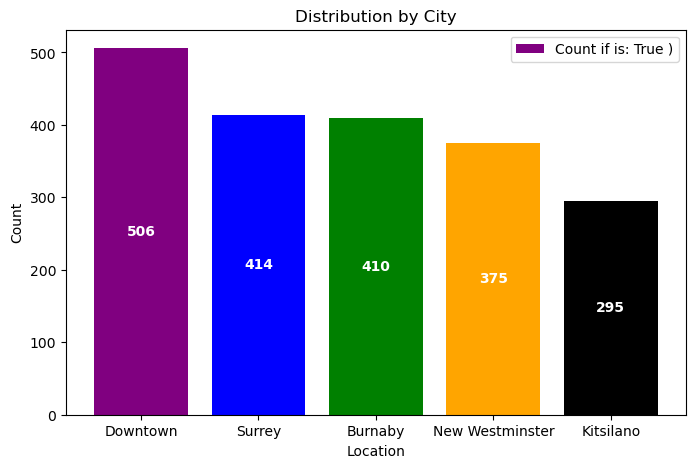

In [24]:
import matplotlib.pyplot as plt

# List of your boolean columns
cols = [
    "Loc_Burnaby",
    "Loc_Downtown",
    "Loc_Kitsilano",
    "Loc_New Westminster",
    "Loc_Surrey"
]

# Counts of True for each column
data = {col.replace("Loc_", ""): df[col].sum() for col in cols}

# Sort descending
data = dict(sorted(data.items(), key=lambda x: x[1], reverse=True))

#setting different collors bars:
colors = ['purple', 'blue', 'green', 'orange', 'black']  # List of colors for each bar

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(data.keys(), data.values(), color=colors, label="Count if is: True )")

# Add labels inside bars
for i, v in enumerate(data.values()):
    plt.text(i, v/2, str(v), ha="center", va="center", color="white", fontsize=10, weight="bold")

plt.title("Distribution by City")
plt.ylabel("Count")
plt.xlabel("Location")
plt.legend()
plt.show()


I have only two differents DeviceType and Gender I wanna see how much I have in each one

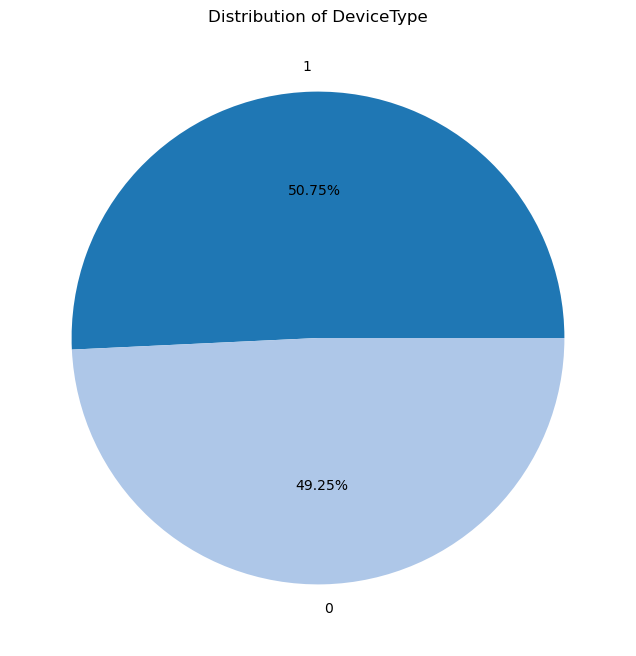

In [30]:
col = "DeviceType"   

# Count values
counts = df[col].value_counts()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.2f%%',   # shows percentage
    colors=plt.cm.tab20.colors 
)
plt.title(f"Distribution of {col}")
plt.show()


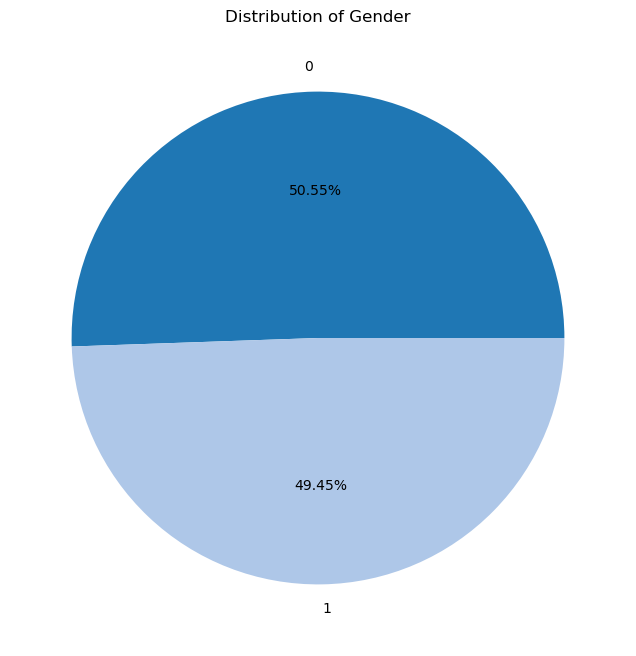

In [29]:
col = "Gender"   

# Count values
counts = df[col].value_counts()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.2f%%',   # shows percentage
    colors=plt.cm.tab20.colors 
)
plt.title(f"Distribution of {col}")
plt.show()
